In [7]:
# IBM HR Analytics Employee Attrition Modeling

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [9]:
#Loading my dataset

df = pd.read_csv('/content/IBM Attrition Data.csv')

df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [10]:
type(df)

pandas.core.frame.DataFrame

In [11]:
# Shape of the dataset

df.shape

(1470, 13)

In [12]:
df.info

<bound method DataFrame.info of       Age Attrition              Department  DistanceFromHome  Education  \
0      41       Yes                   Sales                 1          2   
1      49        No  Research & Development                 8          1   
2      37       Yes  Research & Development                 2          2   
3      33        No  Research & Development                 3          4   
4      27        No  Research & Development                 2          1   
...   ...       ...                     ...               ...        ...   
1465   36        No  Research & Development                23          2   
1466   39        No  Research & Development                 6          1   
1467   27        No  Research & Development                 4          3   
1468   49        No                   Sales                 2          3   
1469   34        No  Research & Development                 8          3   

     EducationField  EnvironmentSatisfaction  JobSatisf

In [13]:
#Attribute type 

df.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [14]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [15]:
#Checking for missing values

df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

In [23]:
#Checking for missing values

df.isnull().values.any()

False

In [16]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60])

In [17]:


#Distribution of numerical variables

df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


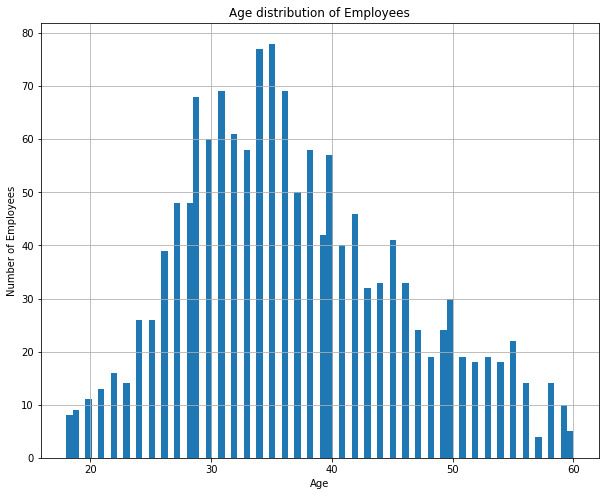

In [18]:
# Distribution of Age of Employees

plt.figure(figsize=(10,8))
df['Age'].hist(bins=80)
plt.title("Age distribution of Employees")
plt.xlabel("Age")
plt.ylabel("Number of Employees")
plt.show()

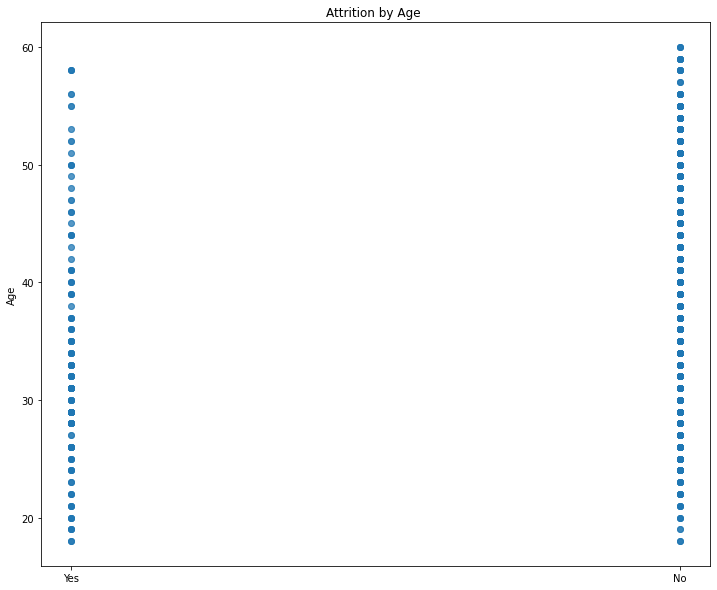

In [19]:
# Explore data for Attrition by Age

plt.figure(figsize=(12,10))
plt.scatter(df.Attrition,df.Age, alpha=.5)
plt.title("Attrition by Age ")
plt.ylabel("Age")
plt.show()

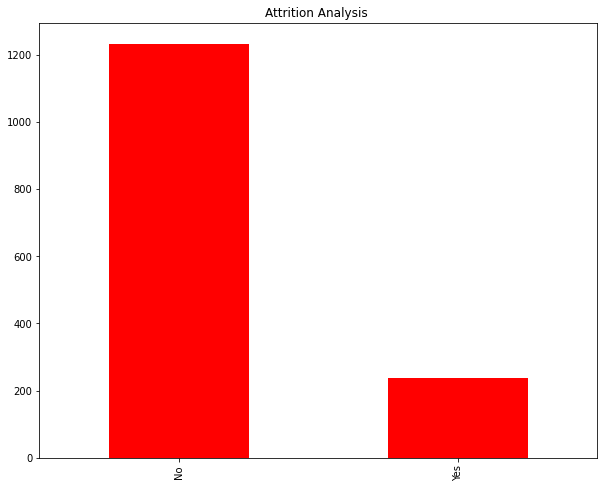

In [20]:
# explore data for Left employees breakdown
plt.figure(figsize=(10,8))
df.Attrition.value_counts().plot(kind='bar',color='r')
plt.title("Attrition Analysis ")
plt.show()

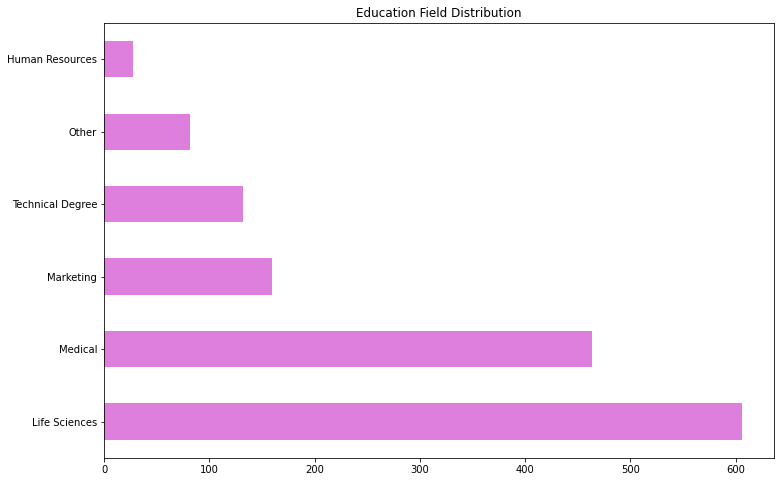

In [21]:
# explore data for Education Field distribution

plt.figure(figsize=(12,8))
df.EducationField.value_counts().plot(kind='barh',color='m',alpha=.5)
plt.title("Education Field Distribution")
plt.show()

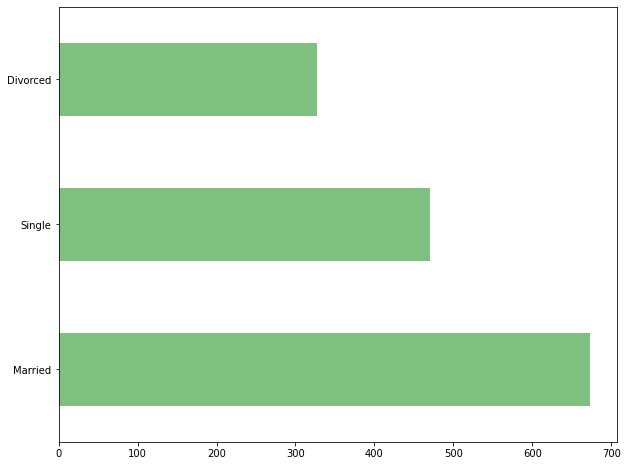

In [22]:
# explore data for Marital Status
plt.figure(figsize=(10,8))
df.MaritalStatus.value_counts().plot(kind='barh', color='g', alpha=.5)
plt.show()

In [24]:
df.corr()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
Age,1.000000,-0.001686,0.208034,0.010146,-0.004892,0.497855,0.299635,-0.021490,0.311309
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,-0.003669,-0.017014,-0.029251,-0.026556,0.009508
Education,0.208034,0.021042,1.000000,-0.027128,-0.011296,0.094961,0.126317,0.009819,0.069114
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.006784,-0.006259,0.012594,0.027627,0.001458
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,1.000000,-0.007157,-0.055699,-0.019459,-0.003803
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.007157,1.000000,0.149515,0.030683,0.514285
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,-0.055699,0.149515,1.000000,-0.008366,-0.118421
WorkLifeBalance,-0.021490,-0.026556,0.009819,0.027627,-0.019459,0.030683,-0.008366,1.000000,0.012089
YearsAtCompany,0.311309,0.009508,0.069114,0.001458,-0.003803,0.514285,-0.118421,0.012089,1.000000


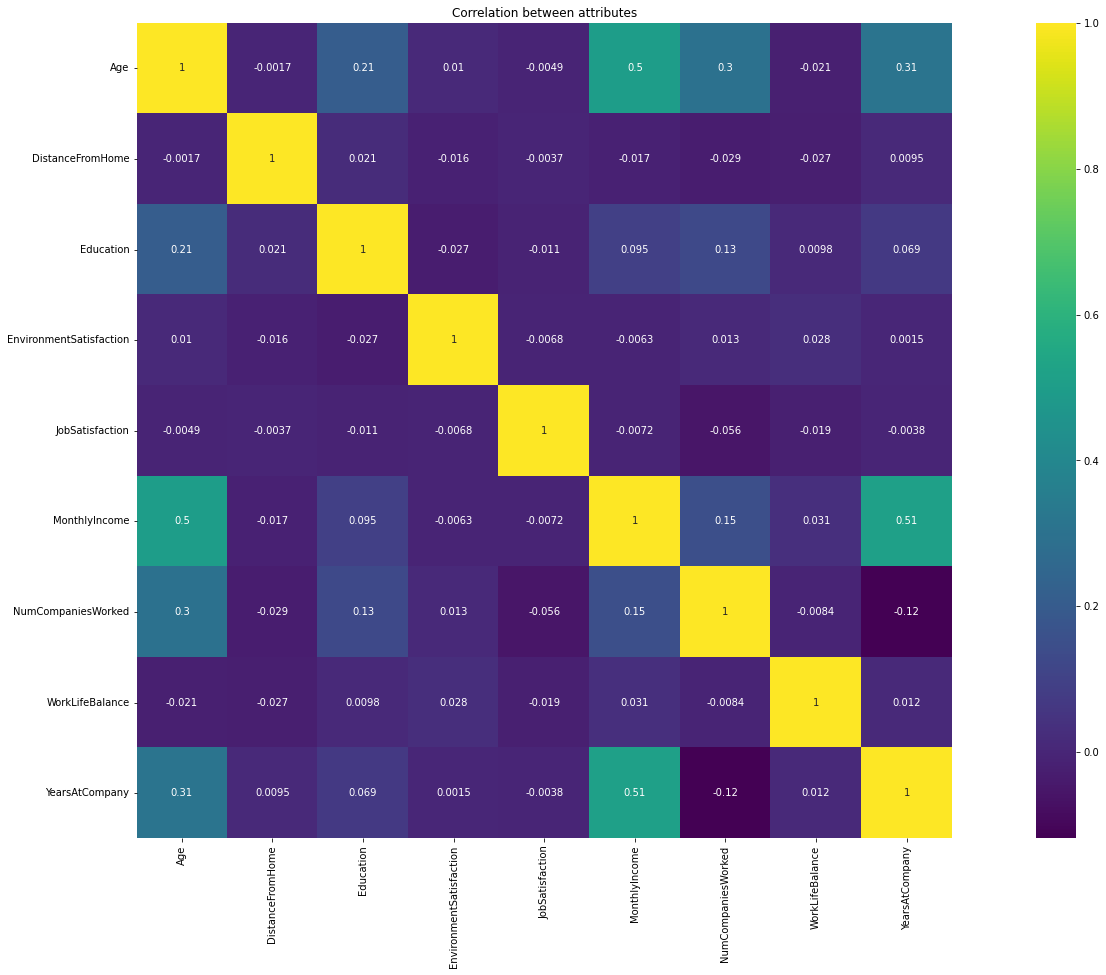

In [28]:
# Plotting a correlation heatmap

plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between attributes')
plt.show()

## Build up a logistic regression model to predict which employees are likely to attrite

In [32]:
#Import modules

import matplotlib
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set(style='white', color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from sklearn import metrics


In [34]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [47]:
x1 = df.drop(['Attrition'], axis=1)
x1

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,3,4,Married,2571,4,3,5
1466,39,Research & Development,6,1,Medical,4,1,Married,9991,4,3,7
1467,27,Research & Development,4,3,Life Sciences,2,2,Married,6142,1,3,6
1468,49,Sales,2,3,Medical,4,2,Married,5390,2,2,9


In [62]:
#Selecting features for training
x = pd.get_dummies(x1)
x

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Department_Human Resources,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,0,...,1,0,1,0,0,0,0,0,0,1
1,49,8,1,3,2,5130,1,3,10,0,...,0,0,1,0,0,0,0,0,1,0
2,37,2,2,4,3,2090,6,3,0,0,...,0,0,0,0,0,1,0,0,0,1
3,33,3,4,4,3,2909,1,3,8,0,...,0,0,1,0,0,0,0,0,1,0
4,27,2,1,1,2,3468,9,3,2,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2571,4,3,5,0,...,0,0,0,0,1,0,0,0,1,0
1466,39,6,1,4,1,9991,4,3,7,0,...,0,0,0,0,1,0,0,0,1,0
1467,27,4,3,2,2,6142,1,3,6,0,...,0,0,1,0,0,0,0,0,1,0
1468,49,2,3,4,2,5390,2,2,9,0,...,1,0,0,0,1,0,0,0,1,0


In [43]:
#Select the target variable (Dependent variable)

y = df['Attrition']
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [51]:
#Convert the categorical input into numerical

y.replace('Yes',1, inplace=True)
y.replace('No',0, inplace=True)

In [52]:
print(x.shape)
print(y.shape)

(1470, 21)
(1470,)


In [53]:
#Split the data into training and test data

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=100)

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1029, 21)
(441, 21)
(1029,)
(441,)


In [60]:
#Instantiate the Classifier model

model = LogisticRegression()


In [61]:
#Fit the model on the training data

model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [63]:
y_pred = model.predict(x_test)

In [77]:
cm = metrics.confusion_matrix(y_test, y_pred)

cm

array([[368,   3],
       [ 70,   0]])

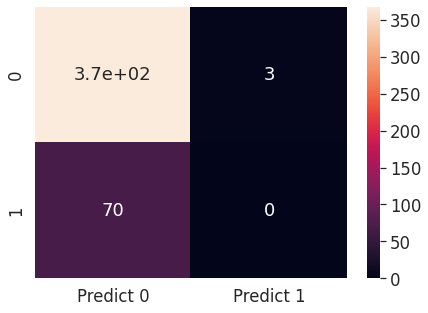

In [85]:
cm = metrics.confusion_matrix(y_test, y_pred, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['0', '1']],
                     columns = [i for i in ['Predict 0', 'Predict 1']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [65]:
metrics.accuracy_score(y_test, y_pred)

0.8344671201814059

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91       371
           1       0.00      0.00      0.00        70

    accuracy                           0.83       441
   macro avg       0.42      0.50      0.45       441
weighted avg       0.71      0.83      0.77       441



In [67]:
model.coef_

array([[ 3.31435841e-03,  3.14976093e-02,  2.35247493e-02,
        -2.32471835e-01, -2.05101172e-01, -1.38379413e-04,
         1.01577326e-01, -9.54303340e-02, -4.47677675e-02,
         1.46753871e-02, -1.70778026e-01,  1.80271971e-01,
         2.31107292e-02,  1.97369700e-02,  7.89173003e-02,
        -1.47751356e-01, -2.31506520e-02,  7.33063406e-02,
        -1.24870280e-01, -1.37414951e-01,  2.86454564e-01]])

In [68]:
model.intercept_

array([0.02417063])

In [69]:
model.predict_proba(x_test)

array([[0.81495173, 0.18504827],
       [0.74026745, 0.25973255],
       [0.94272426, 0.05727574],
       [0.94281776, 0.05718224],
       [0.98464596, 0.01535404],
       [0.91317148, 0.08682852],
       [0.73619665, 0.26380335],
       [0.96015112, 0.03984888],
       [0.89835304, 0.10164696],
       [0.88397236, 0.11602764],
       [0.77149466, 0.22850534],
       [0.92780396, 0.07219604],
       [0.63366347, 0.36633653],
       [0.9827787 , 0.0172213 ],
       [0.66724723, 0.33275277],
       [0.79650097, 0.20349903],
       [0.95444118, 0.04555882],
       [0.85223633, 0.14776367],
       [0.68283116, 0.31716884],
       [0.80600235, 0.19399765],
       [0.90947761, 0.09052239],
       [0.75694365, 0.24305635],
       [0.93140834, 0.06859166],
       [0.78394478, 0.21605522],
       [0.80913212, 0.19086788],
       [0.88750085, 0.11249915],
       [0.79456874, 0.20543126],
       [0.69533639, 0.30466361],
       [0.85884245, 0.14115755],
       [0.82190824, 0.17809176],
       [0.